# Iteration method

Iteration	 x
1		 0.281250
2		 0.255562
3		 0.254173
4		 0.254105
5		 0.254102

Converged!

Approximate root: 0.25410185518358


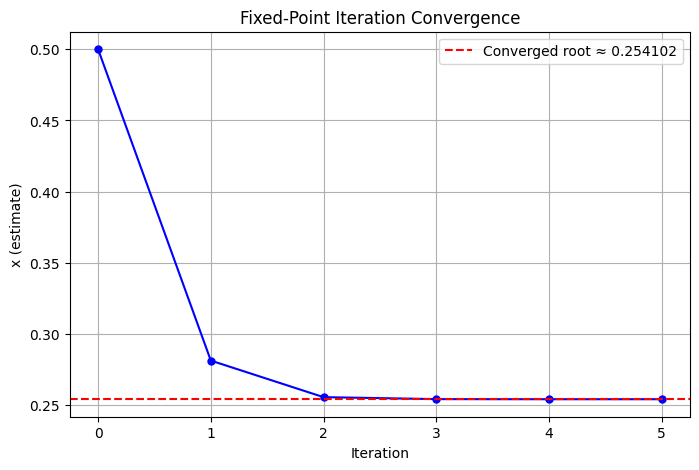

In [56]:
import math
import matplotlib.pyplot as plt

# Corrected function
def g(x):
    return (x**3 + 1) / 4

def fixed_point(x0, tol, n):
    print("Iteration\t x")
    i = 1
    x_values = [x0]  # store values for plotting
    
    while n > 0:
        x1 = g(x0)
        x_values.append(x1)
        print(f"{i}\t\t {x1:.6f}")
        i += 1
        
        if abs(x1 - x0) < tol:
            print("\nConverged!")
            break
        x0 = x1
        n -= 1
    
    print("\nApproximate root:", x1)
    return x1, x_values

# Example usage
x0 = 0.5
tol = 1e-5
n = 100

ans, x_values = fixed_point(x0, tol, n)

# Plotting convergence
plt.figure(figsize=(8,5))
plt.plot(range(len(x_values)), x_values, 'bo-', markersize=5)
plt.axhline(y=ans, color='r', linestyle='--', label=f'Converged root ≈ {ans:.6f}')
plt.xlabel('Iteration')
plt.ylabel('x (estimate)')
plt.title('Fixed-Point Iteration Convergence')
plt.grid(True)
plt.legend()
plt.show()


# Bisection

Iteration	 a		 b		 c		 f(c)
1		 0.000000	 1.000000	 0.500000	 -0.875000
2		 0.000000	 0.500000	 0.250000	 0.015625
3		 0.250000	 0.500000	 0.375000	 -0.447266
4		 0.250000	 0.375000	 0.312500	 -0.219482
5		 0.250000	 0.312500	 0.281250	 -0.102753
6		 0.250000	 0.281250	 0.265625	 -0.043758
7		 0.250000	 0.265625	 0.257812	 -0.014114
8		 0.250000	 0.257812	 0.253906	 0.000744
9		 0.253906	 0.257812	 0.255859	 -0.006688
10		 0.253906	 0.255859	 0.254883	 -0.002973
11		 0.253906	 0.254883	 0.254395	 -0.001115
12		 0.253906	 0.254395	 0.254150	 -0.000185
13		 0.253906	 0.254150	 0.254028	 0.000279
14		 0.254028	 0.254150	 0.254089	 0.000047
15		 0.254089	 0.254150	 0.254120	 -0.000069
16		 0.254089	 0.254120	 0.254105	 -0.000011
17		 0.254089	 0.254105	 0.254097	 0.000018

Converged!

Approximate root: 0.25409698486328125


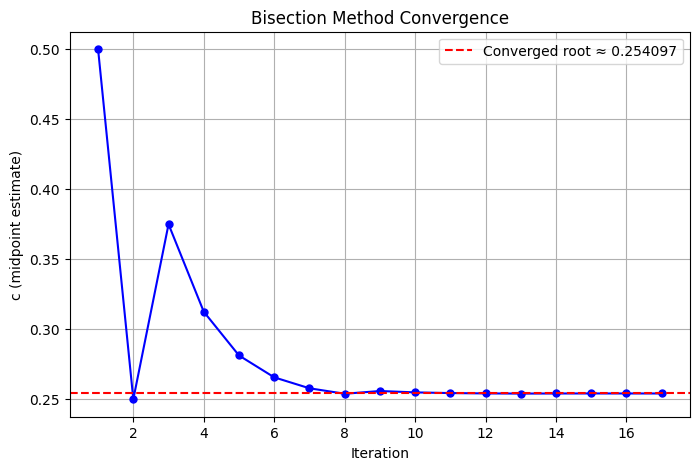

In [57]:
import math
import matplotlib.pyplot as plt

def f(x): return x**3 - 4*x + 1

def bisection(a, b, tol, n):
    if f(a) * f(b) >= 0:
        print("Bisection method fails. f(a) and f(b) must have opposite signs.")
        return None, []

    print("Iteration\t a\t\t b\t\t c\t\t f(c)")
    i = 1
    c_values = []
    
    while i <= n:
        c = (a + b) / 2
        c_values.append(c)
        print(f"{i}\t\t {a:.6f}\t {b:.6f}\t {c:.6f}\t {f(c):.6f}")
        i += 1
        
        if abs(f(c)) < tol or abs(b - a)/2 < tol:
            print("\nConverged!")
            break
        
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    
    print("\nApproximate root:", c)
    return c, c_values

# -------------------------
# Example usage
# -------------------------
a = 0
b = 1
tol = 1e-5
n = 200

root, c_values = bisection(a, b, tol, n)

# -------------------------
# Plotting convergence
# -------------------------
plt.figure(figsize=(8,5))
plt.plot(range(1, len(c_values)+1), c_values, 'bo-', markersize=5)
plt.axhline(y=root, color='r', linestyle='--', label=f'Converged root ≈ {root:.6f}')
plt.xlabel('Iteration')
plt.ylabel('c (midpoint estimate)')
plt.title('Bisection Method Convergence')
plt.grid(True)
plt.legend()
plt.show()


# False position

Iteration	 a		 b		 c		 f(c)
1		 0.000000	 1.000000	 0.333333	 -0.296296
2		 0.000000	 0.333333	 0.257143	 -0.011569
3		 0.000000	 0.257143	 0.254202	 -0.000382
4		 0.000000	 0.254202	 0.254105	 -0.000013
5		 0.000000	 0.254105	 0.254102	 -0.000000

Converged!

Approximate root: 0.25410179652231046


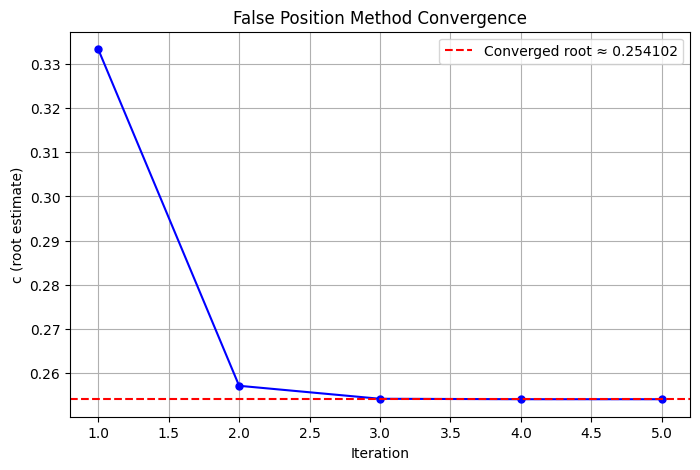

In [58]:
import math
import matplotlib.pyplot as plt

f = lambda x: x**3 - 4*x + 1

def false_position(a, b, tol, n):
    if f(a) * f(b) >= 0:
        print("False Position method fails. f(a) and f(b) must have opposite signs.")
        return None

    print("Iteration\t a\t\t b\t\t c\t\t f(c)")
    i = 1
    c_old = a  
    c_values = []  # store root approximations for plotting
    
    while i <= n:
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))
        c_values.append(c)
        print(f"{i}\t\t {a:.6f}\t {b:.6f}\t {c:.6f}\t {f(c):.6f}")
        
        if abs(f(c)) < tol or abs(c - c_old) < tol:
            print("\nConverged!")
            break
        
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
        
        c_old = c
        i += 1

    print("\nApproximate root:", c)
    return c, c_values

# -------------------------
# Example usage
# -------------------------
a = 0
b = 1
tol = 1e-5
n = 100

root, c_values = false_position(a, b, tol, n)

# -------------------------
# Plotting convergence
# -------------------------
plt.figure(figsize=(8,5))
plt.plot(range(1, len(c_values)+1), c_values, 'bo-', markersize=5)
plt.axhline(y=root, color='r', linestyle='--', label=f'Converged root ≈ {root:.6f}')
plt.xlabel('Iteration')
plt.ylabel('c (root estimate)')
plt.title('False Position Method Convergence')
plt.grid(True)
plt.legend()
plt.show()


# Gauss elimination

Initial Augmented Matrix [A|b]:
[[  2.   1.  -1.   8.]
 [ -3.  -1.   2. -11.]
 [ -2.   1.   2.  -3.]]

After eliminating column 1:
[[ 1.   0.5 -0.5  4. ]
 [ 0.   0.5  0.5  1. ]
 [ 0.   2.   1.   5. ]]

After eliminating column 2:
[[ 1.   0.5 -0.5  4. ]
 [ 0.   1.   1.   2. ]
 [ 0.   0.  -1.   1. ]]

After eliminating column 3:
[[ 1.   0.5 -0.5  4. ]
 [ 0.   1.   1.   2. ]
 [-0.  -0.   1.  -1. ]]

Solution vector x = [ 2.  3. -1.]


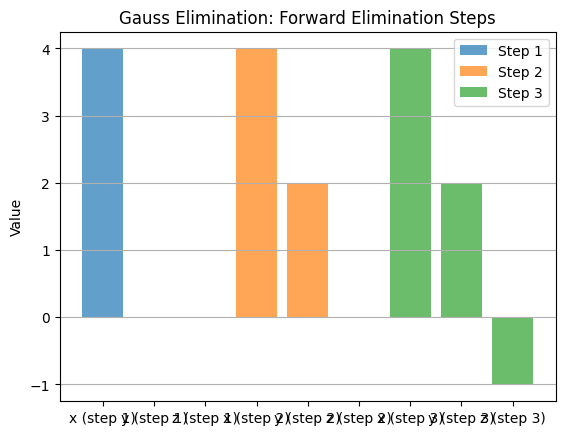

In [59]:
import numpy as np
import matplotlib.pyplot as plt

def gauss_elimination(A, b):
    n = len(b)
    Ab = np.hstack([A.astype(float), b.reshape(-1,1).astype(float)])
    steps = []  # to store solutions after each forward elimination
    
    print("Initial Augmented Matrix [A|b]:")
    print(Ab)
    print()
    
    # Forward Elimination
    for i in range(n):
        pivot = Ab[i][i]
        if pivot == 0:
            raise ValueError("Zero pivot encountered!")
        Ab[i] = Ab[i] / pivot
        
        for j in range(i+1, n):
            factor = Ab[j][i]
            Ab[j] = Ab[j] - factor * Ab[i]
        
        # Store current estimated solutions (upper triangular)
        x_est = np.zeros(n)
        for k in range(i+1):
            x_est[k] = Ab[k, -1]
        steps.append(x_est.copy())
        
        print(f"After eliminating column {i+1}:")
        print(Ab)
        print()
    
    # Back Substitution
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = Ab[i,-1] - np.sum(Ab[i, i+1:n]*x[i+1:n])
    
    return x, steps

# Example system
A = np.array([[2, 1, -1],
              [-3, -1, 2],
              [-2, 1, 2]], dtype=float)
b = np.array([8, -11, -3], dtype=float)

solution, steps = gauss_elimination(A, b)
print("Solution vector x =", solution)

# -------------------------
# Plotting
# -------------------------
variables = ['x', 'y', 'z']
for i, step in enumerate(steps):
    plt.bar([v + f" (step {i+1})" for v in variables], step, alpha=0.7, label=f'Step {i+1}')

plt.ylabel("Value")
plt.title("Gauss Elimination: Forward Elimination Steps")
plt.grid(axis='y')
plt.legend()
plt.show()


# Cramers rule

In [1]:
import numpy as np

def cramers_rule(A, b):
    """
    Solve Ax = b using Cramer's Rule
    A : square matrix (n x n)
    b : column vector (n,)
    Returns: solution vector x
    """
    n = len(b)
    det_A = np.linalg.det(A)
    
    if det_A == 0:
        raise ValueError("Determinant is zero, system has no unique solution.")
    
    x = np.zeros(n)
    for i in range(n):
        # Replace i-th column of A with b
        A_copy = A.copy()
        A_copy[:, i] = b
        det_Ai = np.linalg.det(A_copy)
        x[i] = det_Ai / det_A
    return x

# -------------------------
# Example usage
# -------------------------
# System of equations:
# 2x + y - z = 8
# -3x - y + 2z = -11
# -2x + y + 2z = -3

A = np.array([[2, 1, -1],
              [-3, -1, 2],
              [-2, 1, 2]], dtype=float)

b = np.array([8, -11, -3], dtype=float)

solution = cramers_rule(A, b)
print("Solution vector x =", solution)


Solution vector x = [ 2.  3. -1.]


# Gauss jordan elimination

After step 1:
[2, 1, -1, 8]
[0.0, 0.5, 0.5, 1.0]
[0.0, 2.0, 1.0, 5.0]

After step 2:
[2.0, 0.0, -2.0, 6.0]
[0.0, 0.5, 0.5, 1.0]
[0.0, 0.0, -1.0, 1.0]

After step 3:
[2.0, 0.0, 0.0, 4.0]
[0.0, 0.5, 0.0, 1.5]
[0.0, 0.0, -1.0, 1.0]

Final Solutions: [2.0, 3.0, -1.0]


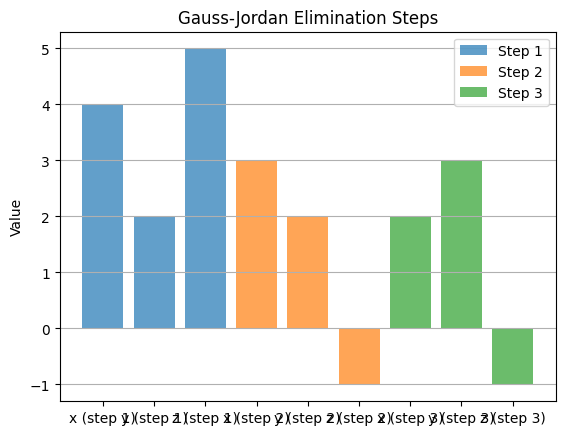

In [60]:
import matplotlib.pyplot as plt

# Augmented matrix [A|b]
arr = [
    [2, 1, -1, 8],
    [-3, -1, 2, -11],
    [-2, 1, 2, -3]
]
N = 3  # number of unknowns

def gauss_jordan(arr, N):
    solutions_steps = []
    
    for i in range(N):
        for j in range(N):
            if i != j:
                p = arr[j][i] / arr[i][i]
                for k in range(N+1):
                    arr[j][k] -= arr[i][k] * p
        # Store current solution estimates for plotting
        current_solutions = [arr[x][N] / arr[x][x] for x in range(N)]
        solutions_steps.append(current_solutions.copy())
        
        print(f"After step {i+1}:")
        for row in arr:
            print(row)
        print()
    
    # Extract final solutions
    solutions = [arr[i][N] / arr[i][i] for i in range(N)]
    print("Final Solutions:", solutions)
    
    return solutions, solutions_steps

# Run Gauss-Jordan
solution, steps = gauss_jordan(arr, N)

# -------------------------
# Plotting
# -------------------------
variables = ['x', 'y', 'z']
for i, step in enumerate(steps):
    plt.bar([v + f" (step {i+1})" for v in variables], step, alpha=0.7, label=f'Step {i+1}')

plt.ylabel("Value")
plt.title("Gauss-Jordan Elimination Steps")
plt.grid(axis='y')
plt.legend()
plt.show()


# Simple linear regression

Equation: Y = 1.00X + 1.00
Prediction for X=5: 6.00


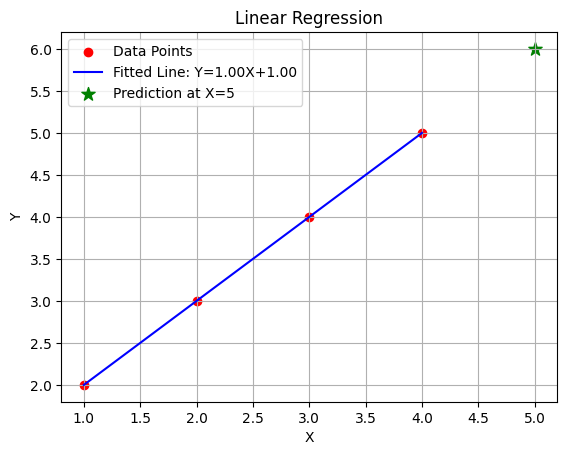

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
X = np.array([1, 2, 3, 4], dtype=float)
Y = np.array([2, 3, 4, 5], dtype=float)
n = len(X)

# Compute slope (m) and intercept (c)
m = (n*np.sum(X*Y) - np.sum(X)*np.sum(Y)) / (n*np.sum(X**2) - (np.sum(X))**2)
c = (np.sum(Y) - m*np.sum(X)) / n

print(f"Equation: Y = {m:.2f}X + {c:.2f}")

# Prediction
X_new = 5
Y_new = m*X_new + c
print(f"Prediction for X={X_new}: {Y_new:.2f}")

# Plotting
plt.scatter(X, Y, color='red', label='Data Points')  # original points
plt.plot(X, m*X + c, color='blue', label=f'Fitted Line: Y={m:.2f}X+{c:.2f}')  # regression line
plt.scatter(X_new, Y_new, color='green', marker='*', s=100, label=f'Prediction at X={X_new}')  # predicted point

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()



# import numpy as np
# from sklearn.linear_model import LinearRegression

# # Dataset
# X = np.array([1, 2, 3, 4]).reshape(-1, 1)
# Y = np.array([2, 3, 4, 5])

# # Fit model
# model = LinearRegression().fit(X, Y)

# print(f"Equation: Y = {model.coef_[0]:.2f}X + {model.intercept_:.2f}")

# # Prediction
# print("Prediction for X=5:", model.predict([[5]])[0])


# Polynomial Regression

Polynomial Coefficients: [0.14375    0.01553571 1.27678571]
Equation:          2
0.1438 x + 0.01554 x + 1.277


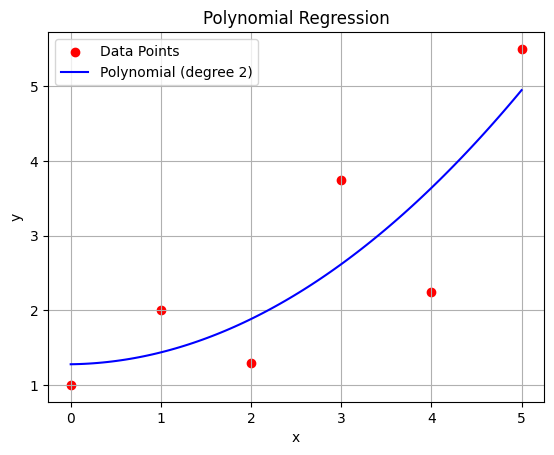

In [62]:
# Polynomial Regression in Python (without using sklearn)

import numpy as np
import matplotlib.pyplot as plt

# Example data
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([1, 2, 1.3, 3.75, 2.25, 5.5])

# Degree of polynomial
degree = 2

# Fit polynomial
coeffs = np.polyfit(x, y, degree)

# Generate polynomial function
poly_eq = np.poly1d(coeffs)

# Predict values
x_new = np.linspace(min(x), max(x), 100)
y_new = poly_eq(x_new)

# Display results
print("Polynomial Coefficients:", coeffs)
print("Equation: ", poly_eq)

# Plot the points and the fitted curve
plt.scatter(x, y, color='red', label='Data Points')
plt.plot(x_new, y_new, color='blue', label=f'Polynomial (degree {degree})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()


# Multiple regression

Coefficients (b0, b1, b2): [0.5 1.5 0.5]


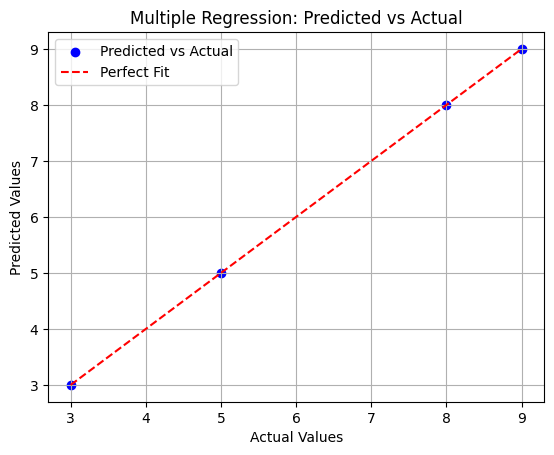

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Example dataset
# Columns: [x1, x2]
X = np.array([
    [1, 2],
    [2, 3],
    [4, 5],
    [3, 6]
], dtype=float)

y = np.array([3, 5, 9, 8], dtype=float)

# Add a column of ones for intercept
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Normal equation to calculate coefficients
B = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
print("Coefficients (b0, b1, b2):", B)

# Predictions
y_pred = X_b @ B

# Plot actual vs predicted
plt.scatter(y, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Regression: Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.show()


# Gradient descent

Estimated slope (m) = 1.0000
Estimated intercept (b) = 1.0000
Prediction for x=5: y=6.0000


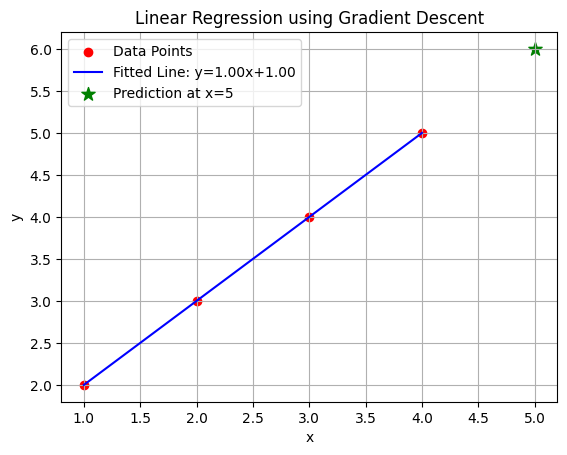

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent Function for Linear Regression
def gradient_descent(x, y, m=0, b=0, learning_rate=0.01, epochs=10000):
    n = len(y)
    for _ in range(epochs):
        y_pred = m * x + b
        dm = (-2/n) * sum(x * (y - y_pred))  # derivative w.r.t m
        db = (-2/n) * sum(y - y_pred)        # derivative w.r.t b
        m -= learning_rate * dm
        b -= learning_rate * db
    return m, b

# -------------------------
# Example dataset
# -------------------------
x = np.array([1, 2, 3, 4], dtype=float)
y = np.array([2, 3, 4, 5], dtype=float)

# Run gradient descent
m, b = gradient_descent(x, y, learning_rate=0.01, epochs=10000)

print(f"Estimated slope (m) = {m:.4f}")
print(f"Estimated intercept (b) = {b:.4f}")

# Prediction example
x_new = 5
y_new = m * x_new + b
print(f"Prediction for x={x_new}: y={y_new:.4f}")

# -------------------------
# Plotting
# -------------------------
plt.scatter(x, y, color='red', label='Data Points')  # original points
plt.plot(x, m*x + b, color='blue', label=f'Fitted Line: y={m:.2f}x+{b:.2f}')  # fitted line
plt.scatter(x_new, y_new, color='green', marker='*', s=100, label=f'Prediction at x={x_new}')  # predicted point

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression using Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()


# Logistic regression

Estimated slope (m) = 2.3867
Estimated intercept (b) = -5.6964
Prediction for x=5: P(Y=1) = 0.9980
Predicted class for x=5: 1


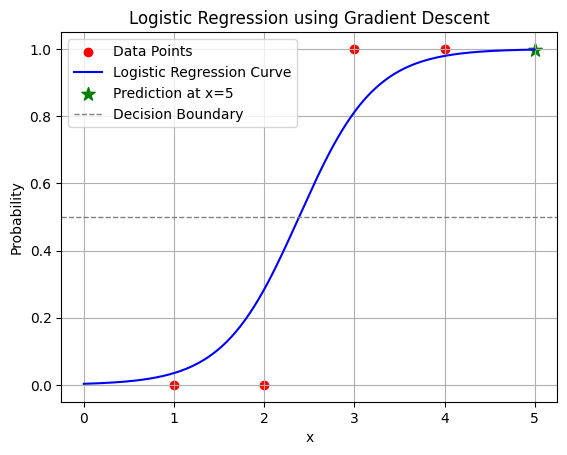

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient Descent for Logistic Regression
def logistic_gradient_descent(x, y, m=0, b=0, learning_rate=0.1, epochs=1000):
    n = len(y)
    for _ in range(epochs):
        z = m*x + b
        y_pred = sigmoid(z)
        
        # Gradients
        dm = (1/n) * sum((y_pred - y) * x)
        db = (1/n) * sum(y_pred - y)
        
        # Update parameters
        m -= learning_rate * dm
        b -= learning_rate * db
        
    return m, b

# -------------------------
# Example dataset (binary)
# -------------------------
x = np.array([1, 2, 3, 4], dtype=float)
y = np.array([0, 0, 1, 1], dtype=float)

# Run gradient descent
m, b = logistic_gradient_descent(x, y, learning_rate=0.1, epochs=1000)

print(f"Estimated slope (m) = {m:.4f}")
print(f"Estimated intercept (b) = {b:.4f}")

# Prediction for new value
x_new = 5
prob = sigmoid(m*x_new + b)
pred_class = 1 if prob >= 0.5 else 0  # predict class

print(f"Prediction for x={x_new}: P(Y=1) = {prob:.4f}")
print(f"Predicted class for x={x_new}: {pred_class}")

# -------------------------
# Plotting
# -------------------------
x_curve = np.linspace(min(x)-1, max(x)+1, 200)
y_curve = sigmoid(m*x_curve + b)

plt.scatter(x, y, color='red', label='Data Points')
plt.plot(x_curve, y_curve, color='blue', label='Logistic Regression Curve')
plt.scatter(x_new, prob, color='green', marker='*', s=100, label=f'Prediction at x={x_new}')
plt.axhline(0.5, color='gray', linestyle='--', linewidth=1, label='Decision Boundary')

plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Logistic Regression using Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()


# logistic built in

Equation: P(Y=1) = 1 / (1 + exp(-(0.9582*X + -2.3955)))
Prediction for X=5: P(Y=1) = 0.9165
Predicted class for X=5: 1


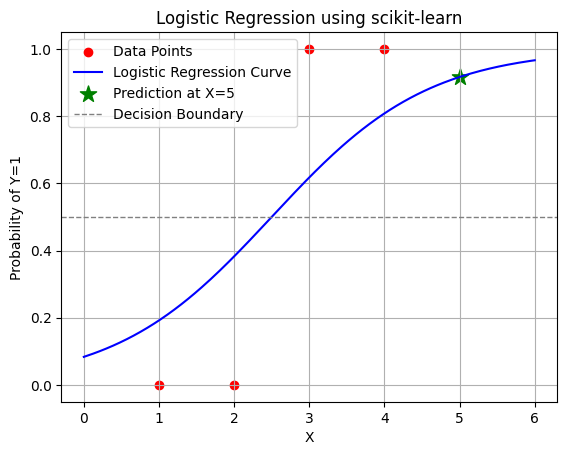

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# -------------------------
# Dataset (binary classification)
# -------------------------
X = np.array([1, 2, 3, 4]).reshape(-1, 1)  # sklearn expects 2D array
Y = np.array([0, 0, 1, 1])

# -------------------------
# Fit Logistic Regression
# -------------------------
model = LogisticRegression()
model.fit(X, Y)

# Extract parameters
m = model.coef_[0][0]       # slope
c = model.intercept_[0]     # intercept

print(f"Equation: P(Y=1) = 1 / (1 + exp(-({m:.4f}*X + {c:.4f})))")

# -------------------------
# Predict probability for new value
# -------------------------
X_new = np.array([[5]])
prob = model.predict_proba(X_new)[0][1]  # probability for class 1
print(f"Prediction for X={X_new[0][0]}: P(Y=1) = {prob:.4f}")

# -------------------------
# Optional: Predict class
# -------------------------
pred_class = model.predict(X_new)[0]
print(f"Predicted class for X={X_new[0][0]}: {pred_class}")

# -------------------------
# Plotting
# -------------------------
X_curve = np.linspace(0, 6, 200).reshape(-1, 1)
Y_curve = model.predict_proba(X_curve)[:, 1]

plt.scatter(X, Y, color='red', label='Data Points')
plt.plot(X_curve, Y_curve, color='blue', label='Logistic Regression Curve')
plt.scatter(X_new, prob, color='green', marker='*', s=150, label=f'Prediction at X={X_new[0][0]}')
plt.axhline(0.5, color='gray', linestyle='--', linewidth=1, label='Decision Boundary')

plt.xlabel('X')
plt.ylabel('Probability of Y=1')
plt.title('Logistic Regression using scikit-learn')
plt.legend()
plt.grid(True)
plt.show()


# newton raphson

Iteration	 x
1		 1.521739
2		 1.521380
3		 1.521380

Root found at: 1.52138


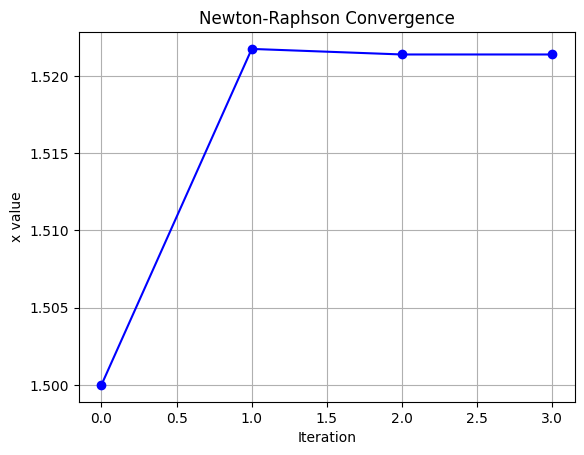

1.5213797068045751

In [67]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x**3 - x - 2   

def df(x):
    return 3*x**2 - 1     

def newton_raphson_plot(x0, tol=1e-6, max_iter=100):
    x_values = [x0]
    print("Iteration\t x")
    for i in range(max_iter):
        x1 = x0 - f(x0)/df(x0)
        x_values.append(x1)
        print(f"{i+1}\t\t {x1:.6f}")
        
        if abs(x1 - x0) < tol:  
            print("\nRoot found at:", round(x1, 6))
            break
        x0 = x1
    else:
        print("Did not converge.")
    
    # Plot convergence
    plt.plot(range(len(x_values)), x_values, marker='o', color='blue')
    plt.xlabel('Iteration')
    plt.ylabel('x value')
    plt.title('Newton-Raphson Convergence')
    plt.grid(True)
    plt.show()

    return x_values[-1]

# Starting guess
x0 = 1.5   
newton_raphson_plot(x0)


# forward interpolation

Forward Difference Table:
[1, 7, 12, 6, 0]
[8, 19, 18, 6]
[27, 37, 24]
[64, 61]
[125]

Interpolated value at x = 2.5 is 42.875000


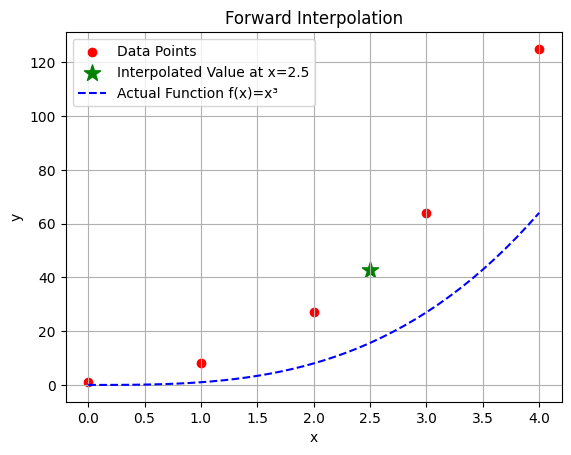

In [68]:
import matplotlib.pyplot as plt

def forward_interpolation(x_values, y_values, x):
    n = len(x_values)
    diff_table = [[0 for _ in range(n)] for _ in range(n)]

    # Initialize first column with y values
    for i in range(n):
        diff_table[i][0] = y_values[i]

    # Calculate forward differences
    for j in range(1, n):
        for i in range(n - j):
            diff_table[i][j] = diff_table[i + 1][j - 1] - diff_table[i][j - 1]

    # Print difference table
    print("Forward Difference Table:")
    for i in range(n):
        print(diff_table[i][:n - i])

    # Interpolation process
    h = x_values[1] - x_values[0]
    p = (x - x_values[0]) / h
    result = y_values[0]

    # Calculate interpolation sum
    for i in range(1, n):
        p_term = p
        for j in range(1, i):
            p_term *= (p - j)
        result += (p_term * diff_table[0][i]) / factorial(i)

    return result

def factorial(n):
    return 1 if n == 0 else n * factorial(n - 1)

# -------------------------
# Example usage
# -------------------------
x_values = [0, 1, 2, 3, 4]
y_values = [1, 8, 27, 64, 125]  # f(x) = x³
x = 2.5

y_interp = forward_interpolation(x_values, y_values, x)
print(f"\nInterpolated value at x = {x} is {y_interp:.6f}")

# -------------------------
# Plotting
# -------------------------
# Original points
plt.scatter(x_values, y_values, color='red', label='Data Points')

# Interpolated point
plt.scatter(x, y_interp, color='green', marker='*', s=150, label=f'Interpolated Value at x={x}')

# Smooth curve for reference
x_smooth = [i*0.1 for i in range(0, 41)]  # from 0 to 4 with small steps
y_smooth = [i**3 for i in x_smooth]  # exact function f(x) = x³
plt.plot(x_smooth, y_smooth, color='blue', linestyle='--', label='Actual Function f(x)=x³')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Forward Interpolation')
plt.legend()
plt.grid(True)
plt.show()


# Backward interpolation


Backward Difference Table:
[1]
[8, 7]
[27, 19, 12]
[64, 37, 18, 6]
[125, 61, 24, 6, 0]

Interpolated value at x = 2.5 is 42.875000


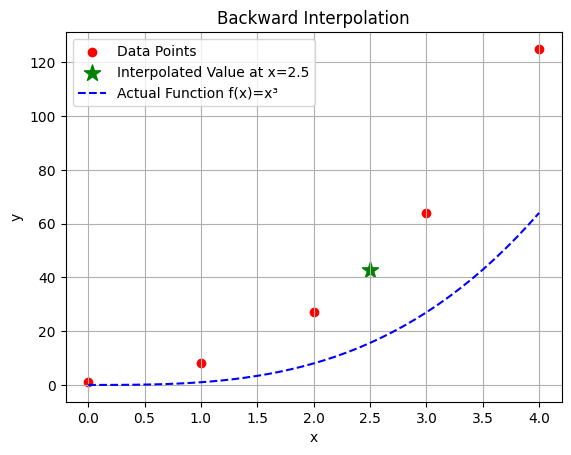

In [69]:
import matplotlib.pyplot as plt

def backward_interpolation(x_values, y_values, x):
    n = len(x_values)
    diff_table = [[0 for _ in range(n)] for _ in range(n)]

    # Initialize first column with y values
    for i in range(n):
        diff_table[i][0] = y_values[i]

    # Calculate backward differences
    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            diff_table[i][j] = diff_table[i][j - 1] - diff_table[i - 1][j - 1]

    # Print difference table
    print("Backward Difference Table:")
    for i in range(n):
        print(diff_table[i][:i + 1])

    # Interpolation process
    h = x_values[1] - x_values[0]
    p = (x - x_values[-1]) / h
    result = y_values[-1]

    # Calculate interpolation sum
    for i in range(1, n):
        p_term = p
        for j in range(1, i):
            p_term *= (p + j)
        result += (p_term * diff_table[-1][i]) / factorial(i)

    return result

def factorial(n):
    return 1 if n == 0 else n * factorial(n - 1)

# -------------------------
# Example usage
# -------------------------
x_values = [0, 1, 2, 3, 4]
y_values = [1, 8, 27, 64, 125]  # f(x) = x³
x = 2.5

y_interp = backward_interpolation(x_values, y_values, x)
print(f"\nInterpolated value at x = {x} is {y_interp:.6f}")

# -------------------------
# Plotting
# -------------------------
plt.scatter(x_values, y_values, color='red', label='Data Points')
plt.scatter(x, y_interp, color='green', marker='*', s=150, label=f'Interpolated Value at x={x}')

# Smooth curve for reference
x_smooth = [i*0.1 for i in range(0, 41)]  # 0 to 4
y_smooth = [i**3 for i in x_smooth]       # f(x) = x³
plt.plot(x_smooth, y_smooth, color='blue', linestyle='--', label='Actual Function f(x)=x³')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Backward Interpolation')
plt.legend()
plt.grid(True)
plt.show()


# Lagrange interpolation

Interpolated value at x = 2.5 is 42.875000


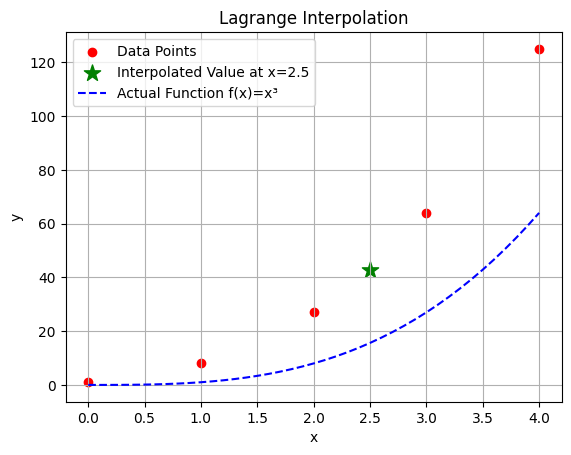

In [70]:
import matplotlib.pyplot as plt

# Lagrange interpolation function
def lagrange_interpolation(x_values, y_values, x):
    n = len(x_values)
    result = 0.0
    for i in range(n):
        term = y_values[i]
        for j in range(n):
            if i != j:
                term *= (x - x_values[j]) / (x_values[i] - x_values[j])
        result += term
    return result

# -------------------------
# Example usage
# -------------------------
x_values = [0, 1, 2, 3, 4]
y_values = [1, 8, 27, 64, 125]  # f(x) = x³
x = 2.5

y_interp = lagrange_interpolation(x_values, y_values, x)
print(f"Interpolated value at x = {x} is {y_interp:.6f}")

# -------------------------
# Plotting
# -------------------------
plt.scatter(x_values, y_values, color='red', label='Data Points')
plt.scatter(x, y_interp, color='green', marker='*', s=150, label=f'Interpolated Value at x={x}')

# Smooth curve for reference
x_smooth = [i*0.1 for i in range(0, 41)]  # 0 to 4
y_smooth = [i**3 for i in x_smooth]       # actual function f(x) = x³
plt.plot(x_smooth, y_smooth, color='blue', linestyle='--', label='Actual Function f(x)=x³')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange Interpolation')
plt.legend()
plt.grid(True)
plt.show()


# Trapozoidal

Integral using single-interval Trapezoidal Rule: 0.750000


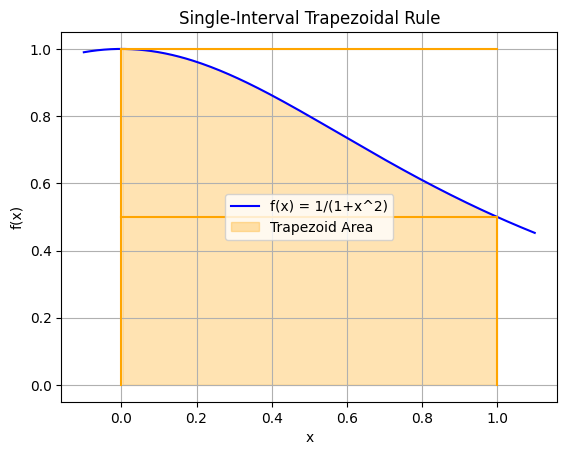

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Example function
def f(x):
    return 1 / (1 + x**2)

# Integration limits
a = 0
b = 1

# Single-interval Trapezoidal Rule
integral = (b - a) * (f(a) + f(b)) / 2
print(f"Integral using single-interval Trapezoidal Rule: {integral:.6f}")

# -------------------------
# Plotting
# -------------------------
x = np.linspace(a-0.1, b+0.1, 200)
y = f(x)

plt.plot(x, y, color='blue', label='f(x) = 1/(1+x^2)')
plt.fill_between(x, y, where=(x >= a) & (x <= b), color='orange', alpha=0.3, label='Trapezoid Area')

# Draw trapezoid lines
plt.plot([a, b], [f(a), f(a)], color='orange')
plt.plot([a, b], [f(b), f(b)], color='orange')
plt.plot([a, a], [0, f(a)], color='orange')
plt.plot([b, b], [0, f(b)], color='orange')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Single-Interval Trapezoidal Rule')
plt.legend()
plt.grid(True)
plt.show()


# simpson 1/3

Simpson's 1/3 Rule (single interval): -3.392443


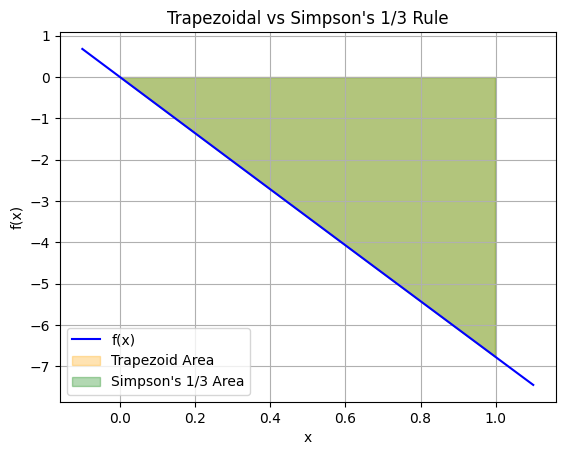

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Function to integrate
def f(x):
    # Correct parentheses and use numpy.log for array support:
    # intended: log(140000 / (140000 - 2100*x))
    return 200.0 * np.log(140000.0 / (140000.0 - 2100.0 * x)) - 9.8 * x

# Simpson's 1/3 Rule (single interval)
def simpson_single_interval(a, b):
    x0 = a
    x2 = b
    x1 = (a + b) / 2
    return (b - a) * (f(x0) + 4*f(x1) + f(x2)) / 6

# Basic single-interval Trapezoidal Rule
def trapezoidal_basic(a, b):
    return (b - a) * (f(a) + f(b)) / 2

# Example usage
a = 0
b = 1

simpson_result = simpson_single_interval(a, b)
trapezoid_result = trapezoidal_basic(a, b)

print(f"Simpson's 1/3 Rule (single interval): {simpson_result:.6f}")


# -------------------------
# Plotting
# -------------------------
x = np.linspace(a-0.1, b+0.1, 200)
y = f(x)

plt.plot(x, y, color='blue', label='f(x)')

# Trapezoid area
plt.fill_between(x, y, where=(x >= a) & (x <= b), color='orange', alpha=0.3, label='Trapezoid Area')

# Simpson's 1/3 area (parabolic approximation)
x0, x1, x2 = a, (a+b)/2, b
x_parabola = np.linspace(a, b, 100)
y_parabola = f(x0) * (x_parabola - x1)*(x_parabola - x2)/((x0 - x1)*(x0 - x2)) + \
             f(x1) * (x_parabola - x0)*(x_parabola - x2)/((x1 - x0)*(x1 - x2)) + \
             f(x2) * (x_parabola - x0)*(x_parabola - x1)/((x2 - x0)*(x2 - x1))
plt.fill_between(x_parabola, y_parabola, color='green', alpha=0.3, label="Simpson's 1/3 Area")

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Trapezoidal vs Simpson\'s 1/3 Rule')
plt.legend()
plt.grid(True)
plt.show()


# simpson 3/8

Simpson's 3/8 Rule (single interval): -3.392443
Basic Trapezoidal Rule (single interval): -3.388636


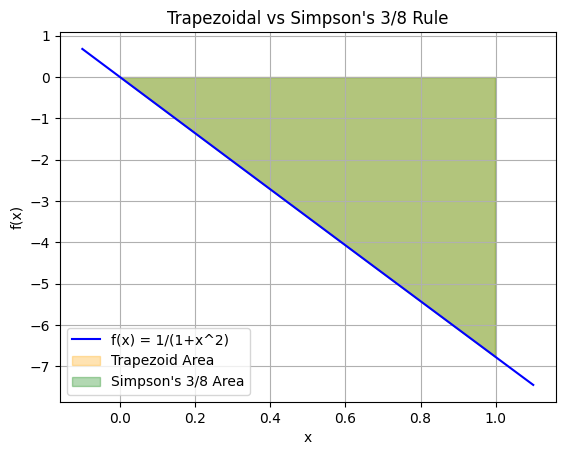

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Function to integrate
def f(x):
   return 200.0 * np.log(140000.0 / (140000.0 - 2100.0 * x)) - 9.8 * x


# Simpson's 3/8 Rule (single interval)
def simpson_three_eighth_single(a, b):
    h = (b - a) / 3
    x0 = a
    x1 = a + h
    x2 = a + 2*h
    x3 = b
    return (b - a) * (f(x0) + 3*f(x1) + 3*f(x2) + f(x3)) / 8

# Basic single-interval Trapezoidal Rule
def trapezoidal_basic(a, b):
    return (b - a) * (f(a) + f(b)) / 2

# -------------------------
# Example usage
# -------------------------
a = 0
b = 1

simpson_3_8_result = simpson_three_eighth_single(a, b)
trapezoid_result = trapezoidal_basic(a, b)

print(f"Simpson's 3/8 Rule (single interval): {simpson_3_8_result:.6f}")
print(f"Basic Trapezoidal Rule (single interval): {trapezoid_result:.6f}")

# -------------------------
# Plotting
# -------------------------
x = np.linspace(a-0.1, b+0.1, 200)
y = f(x)

plt.plot(x, y, color='blue', label='f(x) = 1/(1+x^2)')

# Trapezoid area
plt.fill_between(x, y, where=(x >= a) & (x <= b), color='orange', alpha=0.3, label='Trapezoid Area')

# Simpson's 3/8 area (cubic approximation)
x0, x1, x2, x3 = a, a + (b-a)/3, a + 2*(b-a)/3, b
x_cubic = np.linspace(a, b, 100)
# Cubic Lagrange polynomial for 4 points
y_cubic = (
    f(x0) * (x_cubic-x1)*(x_cubic-x2)*(x_cubic-x3)/((x0-x1)*(x0-x2)*(x0-x3)) +
    f(x1) * (x_cubic-x0)*(x_cubic-x2)*(x_cubic-x3)/((x1-x0)*(x1-x2)*(x1-x3)) +
    f(x2) * (x_cubic-x0)*(x_cubic-x1)*(x_cubic-x3)/((x2-x0)*(x2-x1)*(x2-x3)) +
    f(x3) * (x_cubic-x0)*(x_cubic-x1)*(x_cubic-x2)/((x3-x0)*(x3-x1)*(x3-x2))
)
plt.fill_between(x_cubic, y_cubic, color='green', alpha=0.3, label="Simpson's 3/8 Area")

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Trapezoidal vs Simpson's 3/8 Rule")
plt.legend()
plt.grid(True)
plt.show()


# Milnes method

x = 0.4000, Predicted y = 1.571840, Corrected y = 1.554495


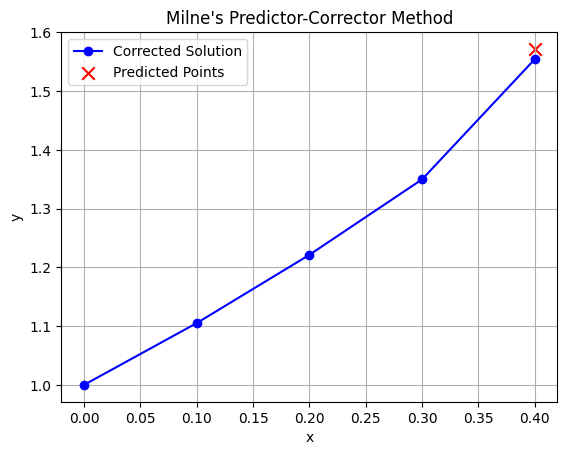

In [74]:
import matplotlib.pyplot as plt

# Function dy/dx
def f(x, y):
    return x + y  # Example: dy/dx = x + y

# Milne's Predictor-Corrector Method
def milne_method(x_values, y_values, h, x_to_find):
    predicted_points = []
    corrected_points = []

    n = len(x_values)
    
    while x_values[-1] < x_to_find:
        # Predictor formula
        y_pred = y_values[-4] + (4 * h / 3) * (2*f(x_values[-3], y_values[-3]) 
                                               - f(x_values[-2], y_values[-2]) 
                                               + 2*f(x_values[-1], y_values[-1]))
        x_next = x_values[-1] + h
        predicted_points.append((x_next, y_pred))

        # Corrector formula
        y_corr = y_values[-2] + (h / 3) * (f(x_values[-2], y_values[-2]) 
                                           + 4*f(x_values[-1], y_values[-1]) 
                                           + f(x_next, y_pred))
        corrected_points.append((x_next, y_corr))

        # Update for next iteration
        x_values.append(x_next)
        y_values.append(y_corr)

        print(f"x = {x_next:.4f}, Predicted y = {y_pred:.6f}, Corrected y = {y_corr:.6f}")

    return x_values, y_values, predicted_points, corrected_points

# -------------------------
# Example usage
# -------------------------
x_values = [0, 0.1, 0.2, 0.3]
y_values = [1, 1.1052, 1.2214, 1.3499]  # Initial known values
h = 0.1
x_to_find = 0.4

x_vals, y_vals, preds, corrs = milne_method(x_values, y_values, h, x_to_find)

# -------------------------
# Plotting
# -------------------------
plt.plot(x_vals, y_vals, 'b-o', label='Corrected Solution', markersize=6)

# Plot predicted points
x_pred, y_pred = zip(*preds)
plt.scatter(x_pred, y_pred, color='red', marker='x', s=80, label='Predicted Points')

plt.xlabel('x')
plt.ylabel('y')
plt.title("Milne's Predictor-Corrector Method")
plt.legend()
plt.grid(True)
plt.show()


# Picards method

Iteration 1: y(0.4) ≈ 1.011136
Iteration 2: y(0.4) ≈ 1.022297
Iteration 3: y(0.4) ≈ 1.033481
Iteration 4: y(0.4) ≈ 1.044690


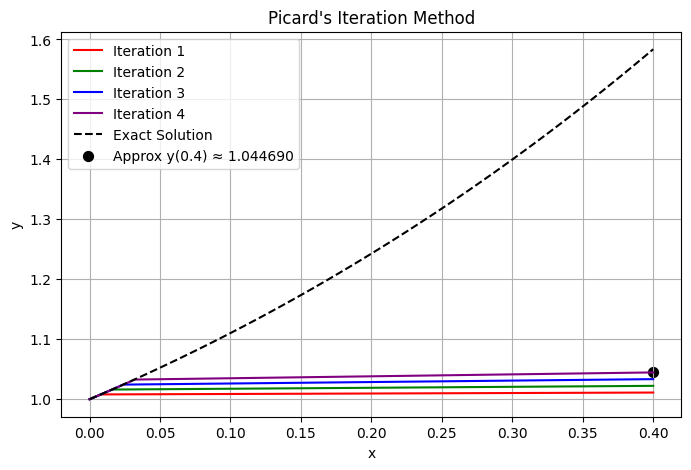

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Function dy/dx
def f(x, y):
    return x + y   # Example: dy/dx = x + y

# Picard's Iteration Method
def picard_method(x0, y0, x_end, n_iter=4, steps=100):
    h = (x_end - x0) / steps
    x_points = np.linspace(x0, x_end, steps + 1)
    
    approximations = []  # store y-points for each iteration

    # Start with initial guess y = y0
    y_points = np.full_like(x_points, y0, dtype=float)
    
    for k in range(n_iter):
        y_new = np.zeros_like(y_points)
        y_new[0] = y0
        for i in range(1, len(x_points)):
            xi_1 = x_points[i-1]
            yi_1 = y_points[i-1]
            y_new[i] = yi_1 + h * f(xi_1, yi_1)  # Euler step approximation
        y_points = y_new.copy()
        approximations.append(y_points)
        print(f"Iteration {k+1}: y({x_end}) ≈ {y_points[-1]:.6f}")

    return x_points, approximations

# -------------------------
# Example usage
# -------------------------
x0 = 0
y0 = 1
x_end = 0.4
n_iter = 4
steps = 50

x_points, approx_list = picard_method(x0, y0, x_end, n_iter, steps)

# -------------------------
# Plotting
# -------------------------
plt.figure(figsize=(8,5))

colors = ['red', 'green', 'blue', 'purple']
for i, y_vals in enumerate(approx_list):
    plt.plot(x_points, y_vals, color=colors[i], label=f'Iteration {i+1}')

# Optional: plot the exact solution for comparison y = -x - 1 + 2*e^x
y_exact = -x_points - 1 + 2*np.exp(x_points)
plt.plot(x_points, y_exact, 'k--', label='Exact Solution')

plt.scatter([x_end], [approx_list[-1][-1]], color='black', s=50, label=f'Approx y({x_end}) ≈ {approx_list[-1][-1]:.6f}')

plt.xlabel('x')
plt.ylabel('y')
plt.title("Picard's Iteration Method")
plt.legend()
plt.grid(True)
plt.show()


# Eulers method

x		y
0.0000	1.000000
0.1000	1.100000
0.2000	1.220000
0.3000	1.362000
0.4000	1.528200


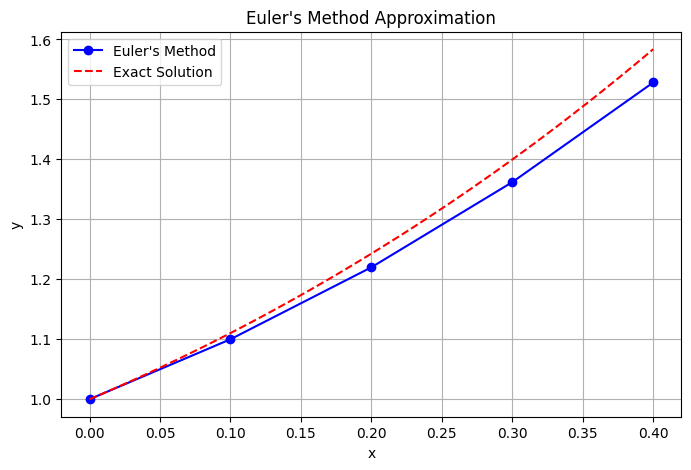

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Function dy/dx
def f(x, y):
    return x + y   # Example: dy/dx = x + y

# Euler's Method
def euler_method(x0, y0, x_end, h):
    n = int((x_end - x0) / h)
    x_points = [x0]
    y_points = [y0]

    x = x0
    y = y0

    print("x\t\ty")
    print(f"{x0:.4f}\t{y0:.6f}")

    for i in range(n):
        y = y + h * f(x, y)
        x = x + h
        x_points.append(x)
        y_points.append(y)
        print(f"{x:.4f}\t{y:.6f}")

    return np.array(x_points), np.array(y_points)

# -------------------------
# Example usage
# -------------------------
x0 = 0
y0 = 1
x_end = 0.4
h = 0.1

x_points, y_points = euler_method(x0, y0, x_end, h)

# Exact solution for comparison: y = -x - 1 + 2*e^x
x_exact = np.linspace(x0, x_end, 100)
y_exact = -x_exact - 1 + 2*np.exp(x_exact)

# -------------------------
# Plotting
# -------------------------
plt.figure(figsize=(8,5))
plt.plot(x_points, y_points, 'bo-', label="Euler's Method", markersize=6)
plt.plot(x_exact, y_exact, 'r--', label='Exact Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Euler's Method Approximation")
plt.legend()
plt.grid(True)
plt.show()
